Default Accuracy (10 estimators): 0.83
Best Accuracy: 0.83 with 42 estimators
Confusion Matrix:
 [[10496   613]
 [ 1864  1680]]


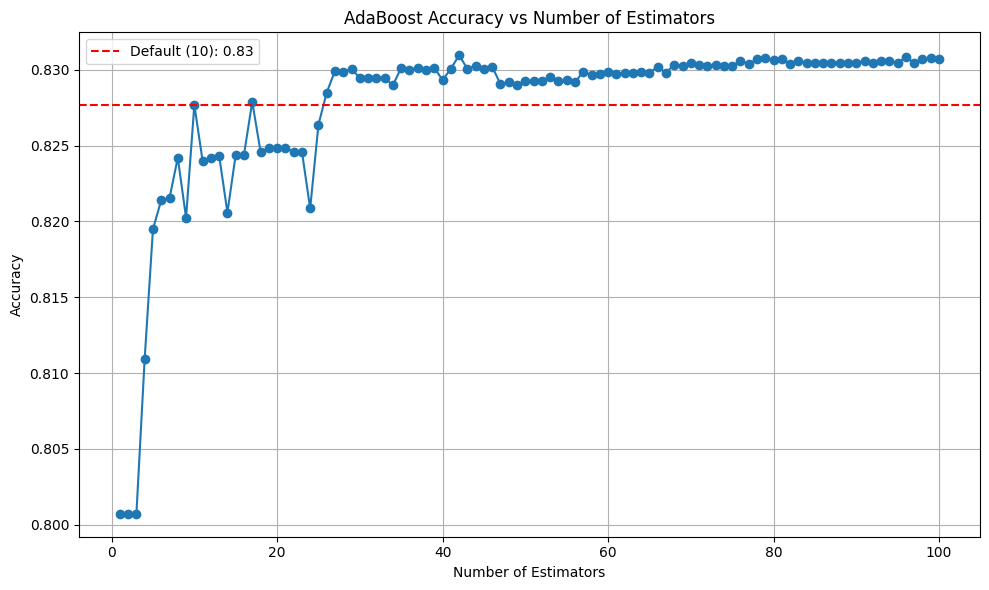

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/income.csv")  # Make sure the CSV is in your working directory

# Define features and target
X = df.drop(columns='income_level')
y = df['income_level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost with default n_estimators = 10
ada_default = AdaBoostClassifier(n_estimators=10, random_state=42)
ada_default.fit(X_train, y_train)
y_pred_default = ada_default.predict(X_test)
default_score = accuracy_score(y_test, y_pred_default)
print(f"Default Accuracy (10 estimators): {default_score:.2f}")

# Fine-tune number of estimators
scores = []
n_estimators_range = range(1, 101)

for n in n_estimators_range:
    ada = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# Best result
best_score = max(scores)
best_n = n_estimators_range[scores.index(best_score)]
print(f"Best Accuracy: {best_score:.2f} with {best_n} estimators")

# Confusion matrix
ada_best = AdaBoostClassifier(n_estimators=best_n, random_state=42)
ada_best.fit(X_train, y_train)
y_pred_best = ada_best.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", conf_matrix)

# Plotting accuracy vs number of estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, scores, marker='o')
plt.axhline(y=default_score, color='r', linestyle='--', label=f'Default (10): {default_score:.2f}')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Accuracy vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
